In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

### <center> Загрузить данные из папки Data Folder

In [72]:
data = pd.read_csv('flag.data', header = None)

In [73]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [74]:
data.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion',
                'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white',
                'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters',
                'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft',
                'botright']

Description:
* name - название страны;
* landmass - часть света;
* zone - квадрант по отношению к Гринвичскому меридиану и экватору;
* area - площадь в тыс. кв. км.;
* population - численность населения в млн. чел.;
* language - язык;
* religion - религия;
* bars - количество вертикальных полос на флаге;
* stripes - количество горизонтальных полос на флаге;
* colours - количество различных цветов на флаге;
* red - есть ли красный цвет на флаге;
* green - есть ли зеленый цвет на флаге;
* blue - есть ли синий цвет на флаге;
* gold - есть ли золотой цвет на флаге;
* white - есть ли белый цвет на флаге;
* black - есть ли черный цвет на флаге;
* orange - есть ли оранжевый цвет на флаге;
* mainhue - преобладающий цвет на флаге;
* circles - количество окружностей на флаге;
* crosses - количество прямых крестов на флаге;
* saltires - количество диагональных крестов на флаге;
* quarters - количество фрагментов на флаге, разделенных на четыре части;
* sunstars - количество символов звезд или солнца на флаге;
* crescent - наличие полумесяца на флаге;
* triangle - наличие треугольника на флаге;
* icon - наличие неодущевленного изображения на флаге;
* animate - наличие одущевленного изображения на флаге;
* text - налисчие букв или текста на флаге;
* topleft - цвет в верхнем левом углу флага;
* botright - цвет в левом нижнем углу флага.

### <center> Провести описательный анализ предложенных данных

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

Посмотрим на числовые переменные:

In [76]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


И на категориальные:

In [77]:
data.describe(include = 'object')

,name,mainhue,topleft,botright
count,194,194,194,194
unique,194,8,7,8
top,Togo,red,red,red
freq,1,71,56,69


Пропущенных значений нет.
Скорее всего придется удалять переменные name, population, area, так как они не имеют отношения к флагу.

Следует отметить, что переменная landmass хотя формально является числовой, но по факту числа кодируют отдельные категории по частям света. Получается, что для данной переменной предварительно выполнен label encoding. Таких переменных много. Следовательно в качестве классификатора целесообразно использовать деревья решений. Логистическую регрессию использовать не получится.

Удалим переменные:

In [78]:
data.drop(['name', 'population', 'area'], axis = 1, inplace = True)

### <center> Предложить стратегию по работе с категориальными переменными

Как отмечалось ранее, для большинства категориальных переменных был использован label encoding. В результате удаления некоторых переменных, непреобразованных категориальных переменных осталось три. Преобразуем их тоже с помощью label encoding.

In [79]:
label_enc = LabelEncoder()

Для переменной mainhue:

In [80]:
label_mainhue = label_enc.fit_transform(data['mainhue'])
label_mainhue = pd.DataFrame(label_mainhue, columns = ['mainhue'])

Для переменной topleft:

In [81]:
label_topleft = label_enc.fit_transform(data['topleft'])
label_topleft = pd.DataFrame(label_topleft, columns = ['topleft'])

Для переменной botright:

In [82]:
label_botright = label_enc.fit_transform(data['botright'])
label_botright = pd.DataFrame(label_botright, columns = ['botright'])

Удалим данные переменные из исходного набора данных:

In [83]:
data.drop(['mainhue', 'topleft', 'botright'], axis = 1, inplace = True)

Объединим в один набор данных:

In [84]:
data = data.join(label_mainhue)
data = data.join(label_topleft)
data = data.join(label_botright)

In [85]:
data.head()

,landmass,zone,language,religion,bars,stripes,colours,red,green,blue,...,quarters,sunstars,crescent,triangle,icon,animate,text,mainhue,topleft,botright
0,5,1,10,2,0,3,5,1,1,0,...,0,1,0,0,1,0,0,4,0,4
1,3,1,6,6,0,0,3,1,0,0,...,0,1,0,0,0,1,0,6,5,6
2,4,1,8,2,2,0,3,1,1,0,...,0,1,1,0,0,0,0,4,3,7
3,6,3,1,1,0,0,5,1,0,1,...,0,0,0,1,1,1,0,1,1,6
4,3,1,6,0,3,0,3,1,0,1,...,0,0,0,0,0,0,0,3,1,6


### <center> Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)

Построим матрицу кореляций:

In [86]:
data_corr = data.corr()

<AxesSubplot:>

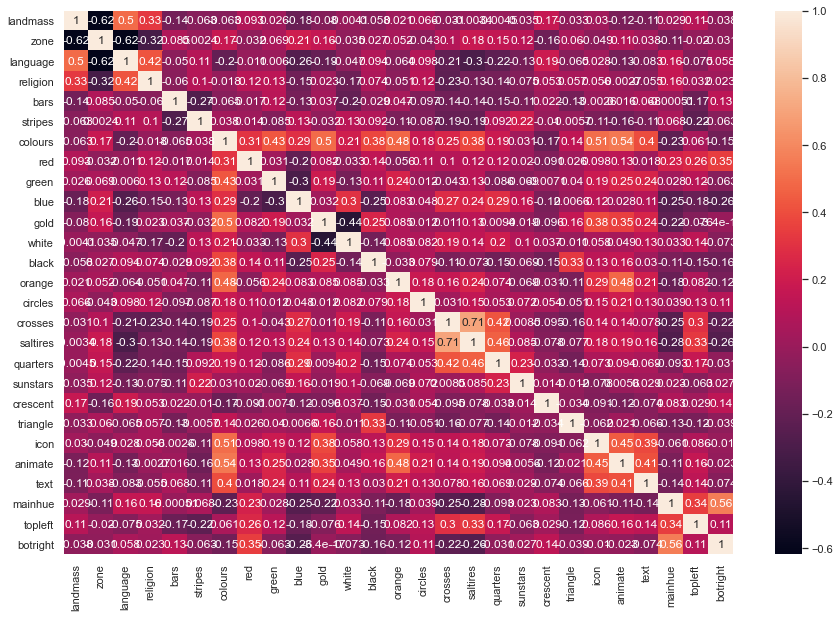

In [87]:
sns.set(rc = ({'figure.figsize':(15, 10)}))
sns.heatmap(data_corr, annot = True, 
            xticklabels = data_corr.columns.values, 
            yticklabels = data_corr.columns.values)

Визуализация так себе...  
Тем не менее, переменная religion коррелирует с :
* language;
* landmass;
* zone;
* crosses.  

Следует отметить, что так как решили использовать деревья решений, то можно не удалить коррелированные переменные.

### <center> Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)

Пока мы уменьшили признаковое пространство на 3 переменные: name, population, area.  
Из тех признаков, которые были удалены, можно было бы создать переменную - плотность население (используя population и area), но пока не будем этого делать.

### <center> Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)

In [88]:
data.religion.value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

Данных очень мало, удалять их нельзя, следовательно, undersampling нам не подходит.

### <center> Построим модель

In [89]:
X = data

In [90]:
y = data.religion

In [91]:
X.drop(['religion'], axis = 1, inplace= True)

In [93]:
ros = RandomOverSampler(random_state = 0)

ros.fit(X, y)
x_resampled, y_resampled = ros.fit_sample(X, y)
print('Количество элементов до операции:', len(X))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 194
Количество элементов после операции: 480


In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [95]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model = RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

Наиболее важные атрибуты для модели Random Forest:

No handles with labels found to put in legend.


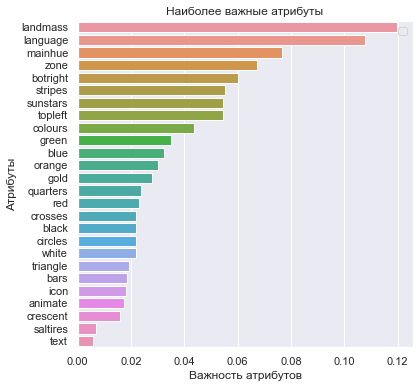

In [97]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Построим confusion matrix:

In [108]:
confusion_matrix(y_test, model_pred)

array([[12,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  8,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  9,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 12,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15]], dtype=int64)

Посчитаем качество модели - classification report:

In [98]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.67      0.80        12
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        12
           5       0.78      1.00      0.88         7
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        15

    accuracy                           0.95        96
   macro avg       0.94      0.95      0.94        96
weighted avg       0.96      0.95      0.95        96



0.9479166666666666

### <center> Проведем кросс-валидацию

In [109]:
cross_val = cross_val_score(model, X, y, cv = 3)

In [113]:
np.mean(cross_val)

0.639102564102564

### <center> Проведем те же операции, только создадим переменную - плотность населения

In [195]:
data_2 = pd.read_csv('flag.data', header = None)

In [196]:
data_2.columns = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion',
                'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white',
                'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters',
                'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft',
                'botright']

In [197]:
data_2.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [198]:
data_2.drop('name', axis = 1, inplace = True)

In [199]:
data_2['density'] = data_2['population'] / data_2['area'] * 1000

In [200]:
data_2.loc[(data_2.population == 0) | (data_2.area == 0), 'density'] = 1

In [201]:
data_2.head()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,density
0,5,1,648,16,10,2,0,3,5,1,...,0,1,0,0,1,0,0,black,green,24.691358
1,3,1,29,3,6,6,0,0,3,1,...,0,1,0,0,0,1,0,red,red,103.448276
2,4,1,2388,20,8,2,2,0,3,1,...,0,1,1,0,0,0,0,green,white,8.375209
3,6,3,0,0,1,1,0,0,5,1,...,0,0,0,1,1,1,0,blue,red,1.000000
4,3,1,0,0,6,0,3,0,3,1,...,0,0,0,0,0,0,0,blue,red,1.000000


In [202]:
data_2.drop(['mainhue', 'topleft', 'botright'], axis = 1, inplace = True)

In [203]:
data_2 = data_2.join(label_mainhue)
data_2 = data_2.join(label_topleft)
data_2 = data_2.join(label_botright)

In [204]:
X = data_2

In [205]:
y = data_2.religion

In [206]:
X.drop(['religion'], axis = 1, inplace= True)

In [207]:
ros = RandomOverSampler(random_state = 0)

ros.fit(X, y)
x_resampled, y_resampled = ros.fit_sample(X, y)
print('Количество элементов до операции:', len(X))
print('Количество элементов после операции:', len(x_resampled))

Количество элементов до операции: 194
Количество элементов после операции: 480


In [208]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.2)

In [209]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model = RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(x_train, y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


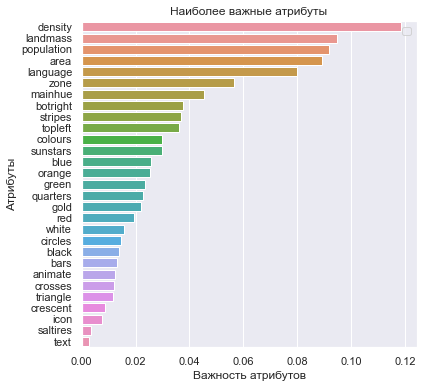

In [210]:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [211]:
confusion_matrix(y_test, model_pred)

array([[1, 0, 1, 1, 3, 1, 2, 3],
       [1, 1, 0, 0, 2, 2, 1, 2],
       [4, 0, 1, 2, 4, 2, 1, 1],
       [1, 0, 0, 0, 5, 1, 2, 2],
       [1, 4, 1, 0, 0, 3, 1, 1],
       [1, 2, 3, 2, 2, 0, 1, 1],
       [0, 1, 1, 1, 2, 1, 1, 1],
       [4, 2, 1, 1, 1, 1, 4, 4]], dtype=int64)

Адовая матрица какая-то...

In [212]:
model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

model.score(x_test, y_test)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.80      0.44      0.57         9
           2       0.93      0.93      0.93        15
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        12
           6       0.89      1.00      0.94         8
           7       1.00      1.00      1.00        18

    accuracy                           0.93        96
   macro avg       0.92      0.91      0.91        96
weighted avg       0.93      0.93      0.92        96



0.9270833333333334

In [213]:
cross_val = cross_val_score(model, X, y, cv = 3)

In [214]:
np.mean(cross_val)

0.6342147435897436

Эксперимент не удался...